<p style="text-align: center; font-size:2.5em;">Final Project </p><br>


# 1. Motivation

In our video we explained how we wanted to provide a report for users to find the best businesses in a city by looking at how satisfied were their customers. To do this, we needed to analyse the reviews of these businesses looking for something else than start rating, namely, performing a sentiment analysis.

### 1.1 What is your dataset?

<p>As mentioned in the video, we had to face a huge amount of <a href="https://www.yelp.com/dataset/download" target="_blank">data</a> (approximately 8GB). However, not all of it was relevant to achieve the goal of our project. So we defined some criteria to select the most relevant data for us. Finally, we gathered this data in three different JSON files:
<li style="margin-left:20px;">business.json: contains information of the 123374 businesses that are still active including location, attributes, and categories.</li>
<li style="margin-left:20px;">review.json: with the full reviews from customers including the user_id from the customer who wrote the review and the business_id of the business which received the review. In total, 376563 reviews, removing those considered unrelevant because they were writen before 2017.</li>
<li style="margin-left:20px;">user.json: picking the 'elite' users (a distinction within yelp's platform) and keeping the active ones during 2017, we got detailed information of 92 users, i.e. friend mapping, number of fans and review count. Initially, appears to be a small number, but through these fields we can reveal information from more than 60000 users such as social connections.</li></p>

### 1.2 Why did you choose this/these particular dataset(s)?

Since we were looking for customers' reviews on different businesses, we looked into one of the best known platforms that provide this service: <a href="https://www.yelp.com/dataset/download" target="_blank">Yelp!</a>. For obvious reasons we couln't access their whole database. Nevertheless, Yelp offers a limited dataset for students, with businesses from a selection of cities, so we can practice our skills as data scientists.

### 1.3 What was your goal for the end user's experience?

The goal of our project is to provide users with a rank of business according to the sentiment on reviews rather than "stars". A customer can grade a business by fastly giving it a certain amount of stars without thinking of the whole customer experience received in that business. However, writing a review takes some time, customers explain their experience and reflect their feeling on the text. That is why we analyze those reviews, to conclude with a "happiness grade" for businesses that users can find more valuable.

# 2. Basic stats. Let's understand the dataset better
### 2.1 Write about your choices in data cleaning and preprocessing

Given such a large dataset we needed to be very careful when filtering to avoid losing relevant information while notably reducing the amount of data involved in our analysis.

The first criterion we followed was time: dividing the activity in Yelp by years. This approach allowed us to provide users with a comprehensive view of progress over time.

We defined criteria for relevance looking for proof-of-trust in the platform, that apply differently for users and for businesses:
- Business: 
- Users: First, we filtered the elite users, which <a href='https://www.yelp-support.com/article/What-is-Yelps-Elite-Squad?l=en_US' target="_blank">according to Yelp</a>, are rewarded for being active and for being role models. This selection was not enough to for us, because it kept some users with very little influence in the platform, thus we only selected users followed by more than 10 fans (we consider it a minimum level of acceptance within the Yelp community), and a minimum count of 50 reviews, to avoid the least active users.


### 2.2 Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)


# 3. Tools, theory and analysis. Describe the process of theory to insight

<p>The vast dimensions of the dataset That have lead us to use new tools in order to filter and to parse the collected data. To do so, we have used the Spark Python API (PySpark) which is a fast and general engine for large-scale data processing. Thanks to it we have been able to reduce the files' size regarding relevant filters. </p>

### 3.1 Talk about how you've worked with text, including regular expressions, unicode, etc.
### 3.2 Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
### 3.3 How did you use the tools to understand your dataset?

# 4. Discussion. Think critically about your creation
### 4.1 What went well?

We struggled to begin working with this dataset because we did not expect such a large amount of data. However, we managed to filter appropreatly so we were able to extract relevant information while keeping the amount of data in a range we could compute.


### 4.2 What is still missing? What could be improved? Why?

Since the dataset Yelp offers to students is rather local than worldwide we only have information on a few cities in the USA. We would have liked to perform this analysis with businesses in Denmark.

We are not very skilled in web development, so with more time to learn new technologies we could improve the user interface.

$\bullet$ __ We first download load the data __

In [38]:
import pandas as pd
import os

df_reviews = pd.DataFrame()
file_list = os.listdir("../yelp_dataset/reviews_filter.json")

for file in file_list:
    # loading the reviews into a dataframe
    df = pd.read_json("../yelp_dataset/reviews_filter.json/" + file, lines=True) #specify that json has multiple lines
    df_reviews = pd.concat([df_reviews, df])

# removing rows containing NaN value and reaffecting index to the df
df_reviews = df_reviews.dropna() 
df_reviews = df_reviews.reset_index(drop=True)

print(len(df_reviews))

376563


In [39]:
# loading the business into a dataframe
df_business = pd.DataFrame()
file_list = os.listdir("../yelp_dataset/open_business.json")
    
for file in file_list:
    # loading business into a dataframe
    df = pd.read_json("../yelp_dataset/open_business.json/" + file, lines=True) #specify that json has multiple lines
    df_business = pd.concat([df_business, df])

# removing rows containing NaN value and reaffecting index to the df
df_business = df_business.dropna() 
df_business = df_business.reset_index(drop=True)

print(len(df_business))

123374


In [3]:
print("Reviews keys : ", list(df_reviews.keys()))
print("Business keys : ", list(df_business.keys()))

Reviews keys :  ['business_id', 'date', 'review_id', 'stars', 'text', 'user_id']
Business keys :  ['address', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state']


<hr>

$\bullet$ __ The idea is now to filter the business dataframe in order to select only the business that have reviews__

In [40]:
list_business = list(df_reviews.business_id.unique())
print(len(list_business))

# selecting only the wanted business
df_business = df_business[df_business['business_id'].isin(list_business) == True]
df_business = df_business.reset_index(drop=True)
print(len(df_business.business_id.unique()))

# strange thing : the two following lists do not have the same length
# print(len(list_business) - len(df_business))
# print(list(set(list_business) - set(list(df_business.business_id.values))))

2416
2386


<hr>

# Analyze comment 

In [5]:
import nltk
from nltk import word_tokenize
labMT = pd.read_csv('data/s001.txt', sep="\t")

In [6]:
# function computing the sentimental value of a text
def computeSentiment(text):
    happiness_average, text = 0, word_tokenize(text)
    words = {word: text.count(word) for word in set(text)}
    
    for word in words:
        val_happiness = labMT[labMT["word"] == word].happiness_average.values
        # checking if the word is in labMT or not
        if len(val_happiness)>0:
            happiness_average += float(val_happiness[0]) * words[word] # taking into account the nb of occurences of the word
            
    return happiness_average / len(text)   

$\bullet$ __Now creating a dictionnary where keys are business id and value a list of all the comments related to this business. In order to compute the rating of each business. And another one where keys are business id and values the sentiment value__

In [7]:
dic_reviews = {business: [] for business in list_business}

for i in range(len(df_reviews)):
    comment = df_reviews.loc[i].text
    business = df_reviews.loc[i].business_id
    
    dic_reviews[business].append(comment)

KeyboardInterrupt: 

$\bullet$ __ Use the first cell to create a json file containing as a key the business id and as value the rate of the busines. Use the second one to load the data from the file.__

In [ ]:
import json
from statistics import mean
dic_rate = {}

for elt in list(dic_reviews.keys()):
    dic_rate[elt] = mean([computeSentiment(text) for text in dic_reviews[elt]])

with open("dic_rate.json",'w') as file:
    json.dump(dic_rate, file, indent=4)

In [41]:
import json

with open("dic_rate.json",'r') as file:
    dic_rate = json.load(file)

$\bullet$ __Displaying informations about the 100 most well ranked business__

In [42]:
import operator
import json

sorted_dic = sorted(dic_rate.items(), key=lambda item: (item[1], item[0]))
sorted_dic.reverse()

top_ranked_business = [elt[0] for elt in sorted_dic[:50]]

df_top_ranked_business = df_business[df_business.business_id.isin(top_ranked_business)]
df_top_ranked_business = df_top_ranked_business.drop(columns=["stars", "longitude", "latitude", "is_open", "business_id", "hours", "neighborhood", "state"])
df_top_ranked_business = df_top_ranked_business.reset_index(drop=True)
df_top_ranked_business.loc[:,'rate'] = pd.Series([elt[1] for elt in sorted_dic[:50]], index=df_top_ranked_business.index)
df_top_ranked_business

top_ranked_business_json = df_top_ranked_business.to_json(orient="index")
top_ranked_business_json = json.loads(top_ranked_business_json)


# with open("top_business.json",'w') as file:
#     json.dump(top_ranked_business_json, file)

ValueError: Wrong number of items passed 50, placement implies 0

$\bullet$ __Ploting the distribution of the business mark__

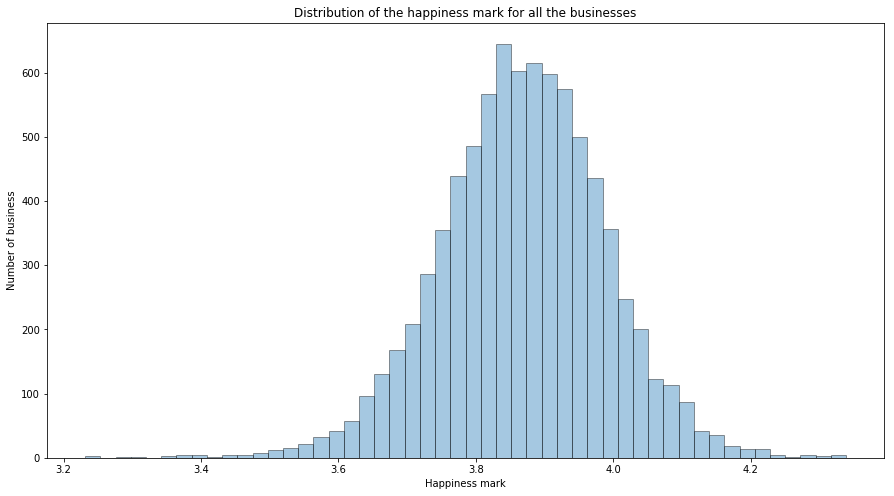

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

df = pd.DataFrame.from_dict(dic_rate, orient='index')
sns.distplot(df, kde=False);
plt.title("Distribution of the happiness mark for all the businesses");
plt.xlabel("Happiness mark");
plt.ylabel("Number of business");
plt.savefig("Website/happiness_distribution.png")

$\bullet$ __WORDCLOUDS__

In [20]:
import nltk
from nltk.corpus import stopwords
import re

def computeTF(text):
    fdist = nltk.FreqDist(text)
    tf = dict()
    for (i,j) in fdist.most_common():
        tf[i] = float(j) / len(text)
    return tf

def computeIDF(text):
    import math
    idf = dict()
    n = len(text)
    for word in text:
        if word not in idf:
            idf[word] = 1
        else:
            idf[word] += 1
    for word,val in idf.items():
        idf[word] = math.log10(n / float(val))
    return idf

def computeTFIDF(text):
    tf = computeTF(text)
    idf = computeIDF(text)
    tfidf = dict()
    for word,value in tf.items():
        tfidf[word] = value*idf[word]
    return tfidf

In [190]:
with open("../yelp_dataset/comments_by_category/comments_Home Services.json", "r") as f:
    text = f.read()
    words = nltk.word_tokenize(text)
    words = [w.lower() for w in words]
    words = [w for w in words 
             if w not in stopwords.words('english')] # remove stop words
    words = [w for w in words
             if not re.search(r'[.,\/#!?$%\^&\*;:{}=\-\—_`´’~()\']', w)] # remove punctuations
    words = [w for w in words
             if not re.search(r'\s|\d+(\.\d+)?', w)] # remove digits

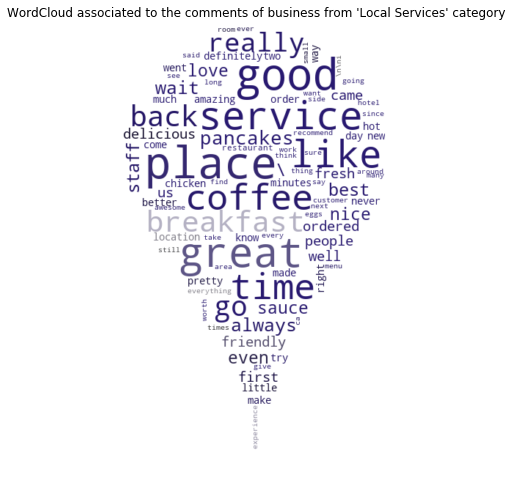

In [232]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests

plt.rcParams["figure.figsize"] = [15, 8];
def generate_wordcloud(tfidf):
    tfidf.pop("would")
    tfidf.pop("get")
    tfidf.pop("got")
    tfidf.pop("one")
    tfidf.pop("could")
    tfidf.pop("also")
    tfidf.pop("pizza")
    tfidf.pop("food")
    
    mask = np.array(Image.open(requests.get("http://www.clker.com/cliparts/Y/d/d/b/I/5/google-maps-purple-marker-hi.png", stream=True).raw))
    wordcloud = WordCloud(background_color="white", max_font_size=60,max_words=90, mask=mask).generate_from_frequencies(frequencies=tfidf)

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud associated to the comments of business from 'Local Services' category")
    plt.savefig("Services_wordcloud.png")

generate_wordcloud(computeTFIDF(words))

<hr>

# Showing positions on a map

In [9]:
# filtering business in order to get business in a small area
df_business["latitude"] = pd.to_numeric(df_business["latitude"]) # changing type of the column to float
df_business["longitude"] = pd.to_numeric(df_business["longitude"])

# df_business = df_business[(df_business["longitude"] > -90) & (df_business['longitude'] < -85) &(df_business['latitude'] < 42)]
# df_business = df_business.reset_index(drop=True)
# print(len(df_business))

Use either one of the following locations :
<li> First one gets all business locations </li>
<li> Second one gets only the locations of the business which sentimental mark is computed</li>

In [10]:
# creating a list containing all localisations of business
locations = []
for i in range(len(df_business)):
    locations.append((df_business.loc[i].latitude, df_business.loc[i].longitude))

In [11]:
# creating a list containing the localisations of all the analyzed business
locations = {}
for business in list(dic_rate.keys()):
    try:
        locations[business] =((df_business[df_business['business_id'] == business].latitude.values[0], df_business[df_business['business_id'] == business].longitude.values[0]))
    except IndexError:
        pass

In [12]:
import statistics

# here we compute the color of each marker (business) regarding their final mark
max_rate = max(dic_rate.values())
med_rate = statistics.median(dic_rate.values())
min_rate = min(dic_rate.values())

def aggregateColors(rate):
    if rate <= med_rate:
        x = int(255*(rate - min_rate)/(med_rate - min_rate))
        return (255, x, 0, 0.8)
    else:
        x = int(255*(rate - med_rate)/(max_rate - med_rate))
        return (255 - x, 255, 0, 0.8)

colors = [aggregateColors(dic_rate[elt]) for elt in list(locations.keys())]
print(len(locations))
print(len(colors))

7927
7927


In [16]:
import gmaps
gmaps.configure(api_key='API_KEY')

place_focus = (33.448376, -112.074036) #focusing on phenix
fig = gmaps.figure(
        center = place_focus,
        zoom_level = 10)
symbols = gmaps.symbol_layer(
        list(locations.values()), 
        fill_color=colors, 
        stroke_color=colors)
fig.add_layer(symbols)

# hm = gmaps.heatmap_layer(locations, weights=rate, max_intensity=max(rate), point_radius=5.0)
# fig.add_layer(hm)

# fig

<hr>

# Trying to operate business categories

$\bullet$ __Changing the type of the column categories to a list__

In [40]:
df_business.categories = df_business.categories.astype(list)
df_business.categories = df_business['categories'].map(lambda a: a.split(",")) # spliting each element of row into a list

$\bullet$ __Finding which categories are the most used__

In [142]:
# function returning a dictionnary with key string and value the nb of occurence
def countingOccurencesListOfLists(list_of_lists):
    flattened = [val.lstrip() for sublist in list_of_lists for val in sublist] # flattening the list of lists
    dic = {key : 0 for key in flattened}
    for row in list_of_lists:
        for elt in row:
            dic[elt.lstrip()] += 1
            
    return dic

In [158]:
import operator

# sorting the tuples according to their nb of occurences
a = countingOccurencesListOfLists(list(df_business.categories.values))
a = sorted(a.items(), key=lambda item: (item[1], item[0]), reverse=True)
print(a[:20])

[('Restaurants', 33461), ('Shopping', 21130), ('Food', 17298), ('Home Services', 14969), ('Beauty & Spas', 13681), ('Health & Medical', 12365), ('Local Services', 10372), ('Automotive', 9457), ('Nightlife', 7796), ('Bars', 7000), ('Event Planning & Services', 6942), ('Active Life', 6020), ('Hair Salons', 4996), ('Auto Repair', 4757), ('Home & Garden', 4740), ('Fashion', 4738), ('Professional Services', 4675), ('Coffee & Tea', 4628), ('American (Traditional)', 4571), ('Fast Food', 4570)]


$\bullet$ __Filter the business by a list of categories__

In [96]:
# filteringItems = [elt[0] for elt in a[133:143]]
# filteringItems=['Nightlife']

def filterDfByListElement(filteringList, df, column):
    indexToDrop = []
    for i in range(len(df)):
        categories = df.loc[i][column]
        if len(set(categories) & set(filteringList)) == 0:
            indexToDrop.append(i)
            
    df = df.drop(indexToDrop)
    df = df.reset_index(drop=True)
    return df

<hr>

# Trying to compare the rate distribution between to business categories

$\bullet$ __Get the sentiment analyzis for the filtered businesses__

In [190]:
import itertools as it
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'b'

# filtering the businesses by two different categories
list_categories = ['Restaurants', 'Nightlife', "Bars", "Breakfast & Brunch", "Sandwiches", "Pizza", "Italian"]

categorie1, categorie2 = 'Restaurants', 'Nightlife'
    
df_filtered_business_1 = filterDfByListElement([categorie1], df_business, 'categories')
df_filtered_business_2 = filterDfByListElement([categorie2], df_business, 'categories')

# getting a list of business_id from both dataframes
list_filter_business_id_1 = list(df_filtered_business_1.business_id.values)
list_filter_business_id_2 = list(df_filtered_business_2.business_id.values)

In [191]:
dic_filtered_1 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_1}
dic_filtered_2 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_2}

$\bullet$ __Ploting the distribution of rates according to a specified category__

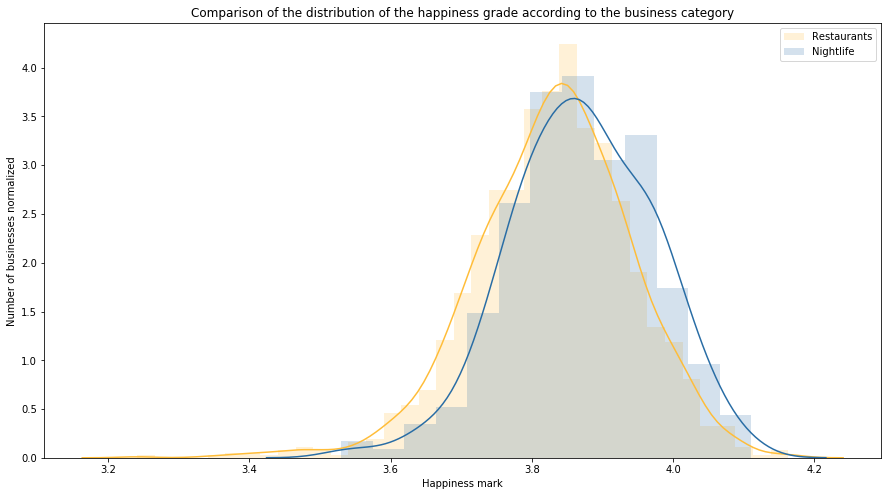

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'b'

df1 = pd.DataFrame.from_dict(dic_filtered_1, orient='index')
df2 = pd.DataFrame.from_dict(dic_filtered_2, orient='index')

sns.distplot(df1, label=categorie1, hist_kws=dict(alpha=.2), color="#FFBD39");
sns.distplot(df2, label=categorie2, hist_kws=dict(alpha=.2), color="#296DA5");
plt.title("Comparison of the distribution of the happiness grade according to the business category");
plt.xlabel("Happiness mark");
plt.ylabel("Number of businesses normalized");
plt.legend();
# plt.savefig("Website/%s_%s.png" %(categorie1, categorie2))

$\bullet$ __Plotting the distribution of grades for the 7 main categories__

In [169]:
categorie1, categorie2, categorie3, categorie4, categorie5, categorie6, categorie7 = 'Restaurants', 'Nightlife', "Bars", "Breakfast & Brunch", "Sandwiches", "Pizza", "Italian"

df_filtered_business_1 = filterDfByListElement([categorie1], df_business, 'categories')
df_filtered_business_2 = filterDfByListElement([categorie2], df_business, 'categories')
df_filtered_business_3 = filterDfByListElement([categorie3], df_business, 'categories')
df_filtered_business_4 = filterDfByListElement([categorie4], df_business, 'categories')
df_filtered_business_5 = filterDfByListElement([categorie5], df_business, 'categories')
df_filtered_business_6 = filterDfByListElement([categorie6], df_business, 'categories')
df_filtered_business_7 = filterDfByListElement([categorie7], df_business, 'categories')

list_filter_business_id_1 = list(df_filtered_business_1.business_id.values)
list_filter_business_id_2 = list(df_filtered_business_2.business_id.values)
list_filter_business_id_3 = list(df_filtered_business_3.business_id.values)
list_filter_business_id_4 = list(df_filtered_business_4.business_id.values)
list_filter_business_id_5 = list(df_filtered_business_5.business_id.values)
list_filter_business_id_6 = list(df_filtered_business_6.business_id.values)
list_filter_business_id_7 = list(df_filtered_business_7.business_id.values)

dic_filtered_1 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_1}
dic_filtered_2 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_2}
dic_filtered_3 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_3}
dic_filtered_4 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_4}
dic_filtered_5 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_5}
dic_filtered_6 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_6}
dic_filtered_7 = {business_id: dic_rate[business_id] for business_id in list_filter_business_id_7}

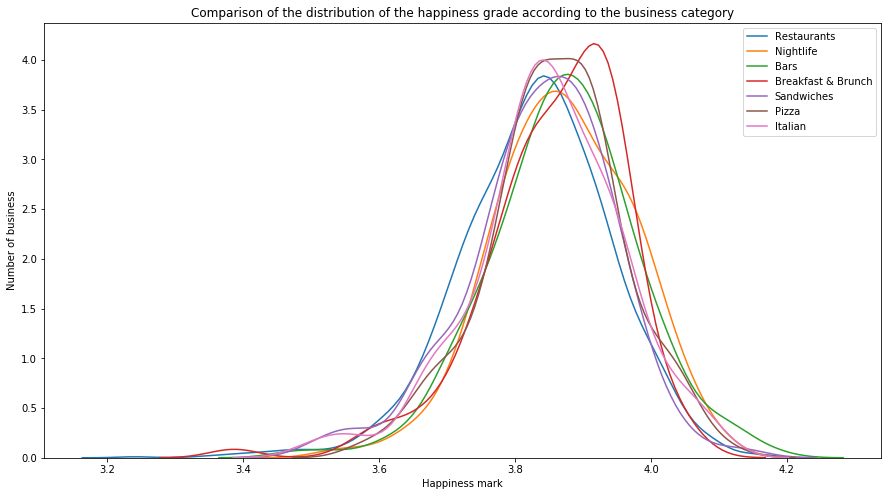

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'b'

df1 = pd.DataFrame.from_dict(dic_filtered_1, orient='index')
df2 = pd.DataFrame.from_dict(dic_filtered_2, orient='index')
df3 = pd.DataFrame.from_dict(dic_filtered_3, orient='index')
df4 = pd.DataFrame.from_dict(dic_filtered_4, orient='index')
df5 = pd.DataFrame.from_dict(dic_filtered_5, orient='index')
df6 = pd.DataFrame.from_dict(dic_filtered_6, orient='index')
df7 = pd.DataFrame.from_dict(dic_filtered_7, orient='index')


# sns.distplot(df1, label=categorie1, hist_kws=dict(alpha=.2));
sns.distplot(df1, label=categorie1, hist=False);
sns.distplot(df2, label=categorie2, hist=False);
sns.distplot(df3, label=categorie3, hist=False);
sns.distplot(df4, label=categorie4, hist=False);
sns.distplot(df5, label=categorie5, hist=False);
sns.distplot(df6, label=categorie6, hist=False);
sns.distplot(df7, label=categorie7, hist=False);

plt.title("Comparison of the distribution of the happiness grade according to the business category");
plt.xlabel("Happiness mark");
plt.ylabel("Number of business");
plt.legend();
plt.savefig("Website/happiness_comparison_categories.png")

<hr>

# Network of elite users with friends

In [ ]:
import pandas as pd
import os

df_elite = pd.DataFrame()
file_list = os.listdir("../yelp_dataset/elite_users_with_friends.json")

for file in file_list:
    # loading the reviews into a dataframe
    df = pd.read_json("../yelp_dataset/elite_users_with_friends.json/" + file, lines=True) #specify that json has multiple lines
    df_elite = df_elite.append(df, ignore_index=True)
    
df_elite = df_elite.dropna() 
df_elite = df_elite.reset_index(drop=True)

$\bullet$ __Setting 'friend' and 'elite' columns as list__

In [ ]:
df_elite.elite = df_elite.elite.astype(list)
df_elite.elite = df_elite['elite'].map(lambda a: a.split(",")) # spliting each element of row into a list

In [ ]:
elite_2010 = filterDfByListElement(['2008'], df_elite, 'elite')

<hr>

# Network business

In [2]:
import os
import pandas as pd

df_users_business = pd.DataFrame()
# loading json file with key users and values business they have written a comment about
folder = os.listdir("../yelp_dataset/elite_2016_and_business.json")

for file in folder:
    df = pd.read_json("../yelp_dataset/elite_2016_and_business.json/" + file, lines=True)
    df_users_business = pd.concat([df_users_business, df])
    
print(len(df_users_business))

716523


In [3]:
# filtering the business that have less than 100 elite visitors
df_users_business = df_users_business.groupby("business_id").filter(lambda x: len(x) > 100)

In [4]:
# transform the group by into a dic where key is id and the value is a list of business_id
# in order to be able to draw edges between business linked by a common user
dic = df_users_business.groupby('user_id')['business_id'].apply(lambda x: x.tolist()).to_dict()

In [5]:
import networkx as nx
import itertools as it

G = nx.Graph()

for key in dic.keys():
    if len(dic[key]) > 1 and len(dic[key]) < 3:
        edges_to_draw = list(it.combinations(dic[key], 2)) #getting all 2-uples combination of the businesses
        G.add_edges_from(edges_to_draw)

In [21]:
import fa2
import matplotlib.pyplot as plt

forceatlas2 = fa2.ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=0,

    # Performance
    jitterTolerance=.01,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio= 1,
    strongGravityMode=True,
    gravity=200,
    # Log
    verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(G,
                                                    pos=None,
                                                    iterations=8000);

100%|██████████| 8000/8000 [00:48<00:00, 135.63it/s]

BarnesHut Approximation  took  15.88  seconds
Repulsion forces  took  29.43  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  0.32  seconds
AdjustSpeedAndApplyForces step  took  1.31  seconds


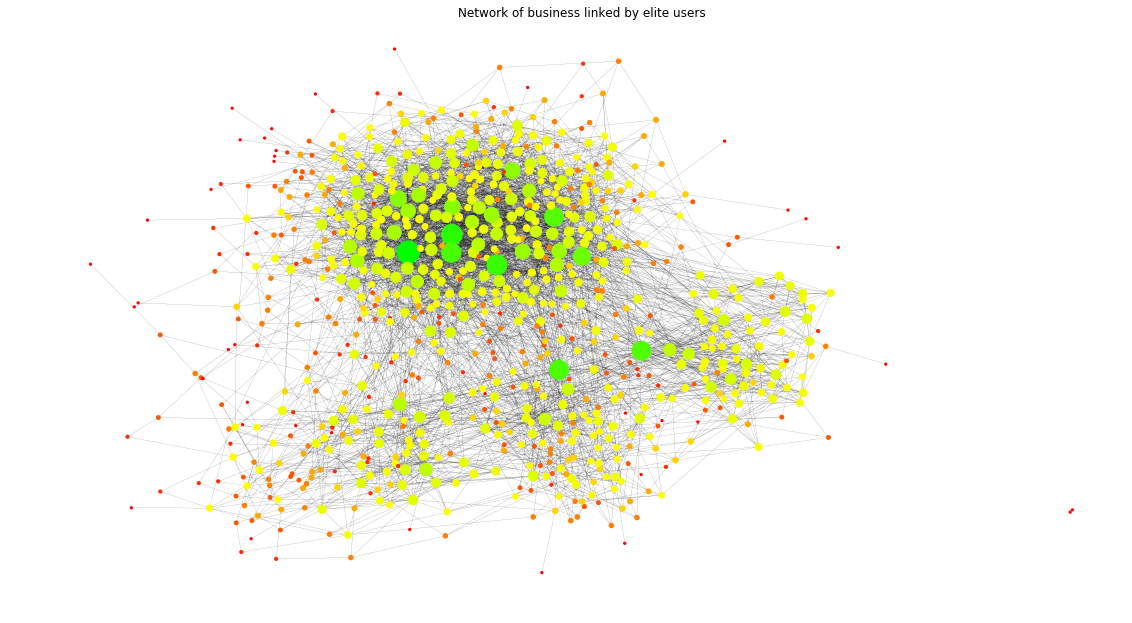

In [24]:
import statistics
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 8];

node_size = []
for elt in list(G.degree()):
    node_size.append(elt[1]*5)
    
node_size.sort()

# here we compute the color of each node regarding their degree
max_size = node_size[-1]
med_size = statistics.median(node_size)
min_size = node_size[0]

def aggregateColors(size):
    if size <= med_size:
        x = int(255*(size - min_size)/(med_size - min_size))
        return (1,x/255,0)
    else:
        x = int(255*(size - med_size)/(max_size - med_size))
        return ((255 - x)/255,1,0)

colors = [aggregateColors(size) for size in node_size]

nx.draw(G, positions, node_size=node_size, node_color=colors, width=.1)
plt.title("Network of business linked by elite users")
plt.savefig("network_business.png")

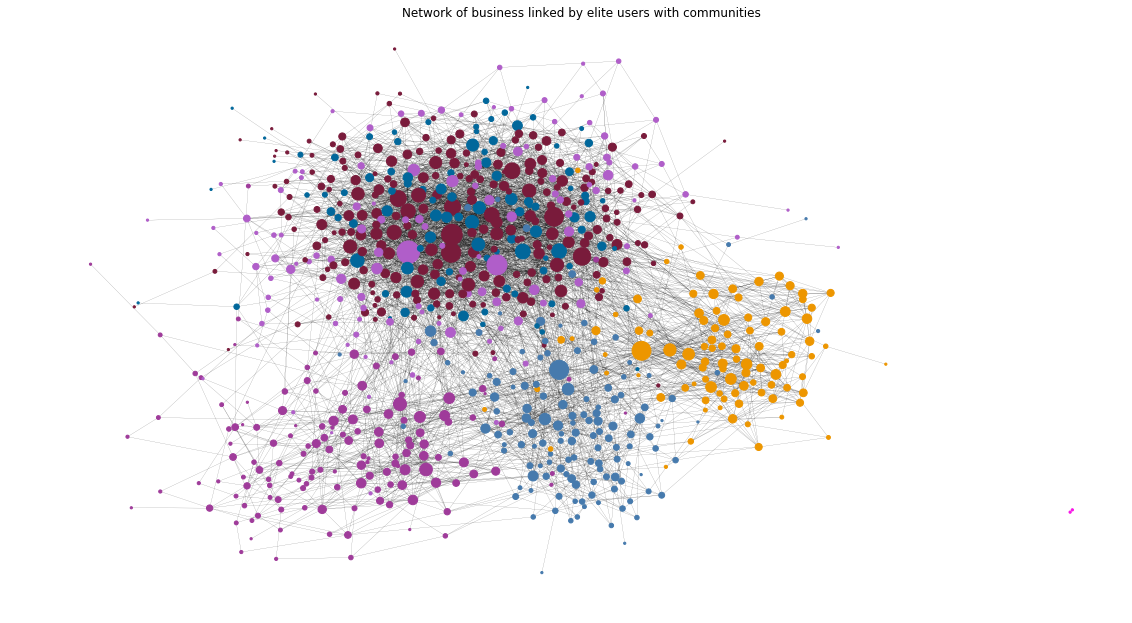

In [28]:
import community
import numpy as np

partition = community.best_partition(G)
node_color_indices = [node[1] for node in partition.items()]
partColors = {i: list(np.random.random(size=3)) for i in set(node_color_indices)}
node_colors = [partColors[index] for index in node_color_indices]

nx.draw(G, positions, node_color=node_colors, node_size=node_size, width=.1)
plt.title("Network of business linked by elite users with communities")
plt.savefig("network_business_communities.png")

## Statistics on users

We have chosen the _relevant_ users, meaning by that those users that follow these requisites:
- they are categorised as _elite_ in the year 2017,
- have at least 10 followers,
- reviewed at least 50 businesses.

In [29]:
# function to split the 'friends' attribute into a list
def split_friends(row):
    row['friends'] = row['friends'].split(",")
    return row

In [30]:
import json
import pandas as pd
import os

path_dir_15 = "elite_users_2015.json/"
path_dir_16 = "elite_users_2016.json/"
path_dir_17 = "elite_users_2017.json/"

list_dir_15 = os.listdir(path_dir_15)
list_dir_16 = os.listdir(path_dir_16)
list_dir_17 = os.listdir(path_dir_17)

elite_users_15 = pd.DataFrame()
elite_users_16 = pd.DataFrame()
elite_users_17 = pd.DataFrame()

for file in list_dir_15:
    df = pd.read_json(path_dir_15 + file, lines=True)
    elite_users_15 = pd.concat([elite_users_15, df])
    
for file in list_dir_16:
    df = pd.read_json(path_dir_16 + file, lines=True)
    elite_users_16 = pd.concat([elite_users_16, df])

for file in list_dir_17:
    df = pd.read_json(path_dir_17 + file, lines=True)
    elite_users_17 = pd.concat([elite_users_17, df])
    
# reindexing the dataframe by user_id
elite_users_15 = elite_users_15.set_index("user_id")
elite_users_16 = elite_users_16.set_index("user_id")
elite_users_17 = elite_users_17.set_index("user_id")

dic_15 = elite_users_15.to_dict('index')
dic_16 = elite_users_16.to_dict('index')
dic_17 = elite_users_17.to_dict('index')

dic_15 = {key: split_friends(value) for key, value in dic_15.items()}
dic_16 = {key: split_friends(value) for key, value in dic_16.items()}
dic_17 = {key: split_friends(value) for key, value in dic_17.items()}

In [33]:
friend_count = [{user: len(dic_15[user]['friends']) for user in dic_15.keys()},
                {user: len(dic_16[user]['friends']) for user in dic_16.keys()},
                {user: len(dic_17[user]['friends']) for user in dic_17.keys()}]

/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


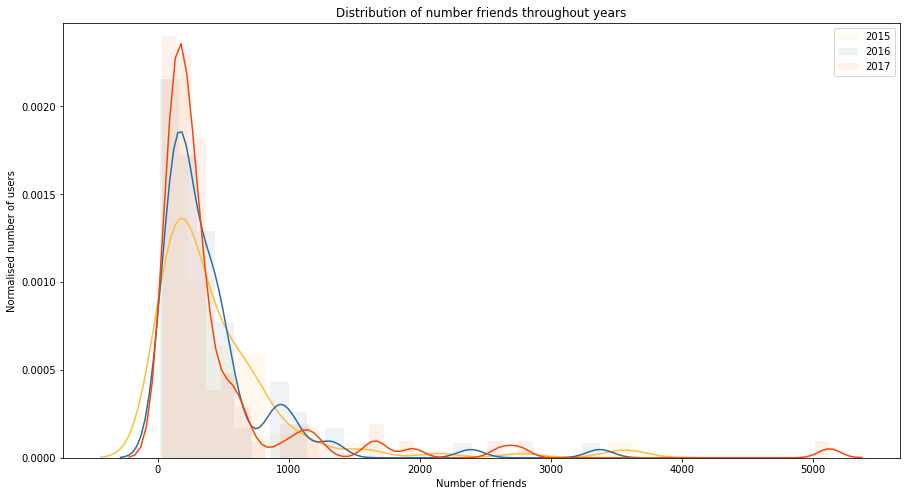

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'b'

df_15 = pd.DataFrame.from_dict(friend_count[0], orient='index')
df_16 = pd.DataFrame.from_dict(friend_count[1], orient='index')
df_17 = pd.DataFrame.from_dict(friend_count[2], orient='index')

sns.distplot(df_15, label='2015', hist_kws=dict(alpha=.08), color="#FFBD39");#, kde=False);
sns.distplot(df_16, label='2016', hist_kws=dict(alpha=.08), color="#296DA5");#, kde=False);
sns.distplot(df_17, label='2017', hist_kws=dict(alpha=.08), color="#f74504");# ,kde=False);


plt.title("Distribution of number friends throughout years");
plt.xlabel("Number of friends");
plt.ylabel("Normalised number of users");
plt.rcParams["figure.figsize"] = [15, 8]
plt.legend();
plt.savefig("Website/user_friends_distribution.png")

In [46]:
fan_count = [{user: dic_15[user]['fans'] for user in dic_15.keys()},
             {user: dic_16[user]['fans'] for user in dic_16.keys()},
             {user: dic_17[user]['fans'] for user in dic_17.keys()}]

/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


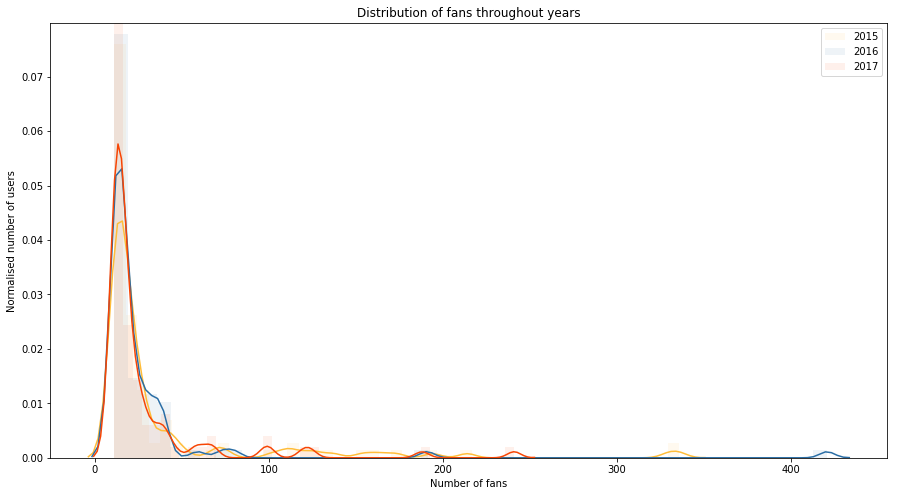

In [52]:
rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'g'

df_15 = pd.DataFrame.from_dict(fan_count[0], orient='index')
df_16 = pd.DataFrame.from_dict(fan_count[1], orient='index')
df_17 = pd.DataFrame.from_dict(fan_count[2], orient='index')

sns.distplot(df_15, label='2015', hist_kws=dict(alpha=.08), color="#FFBD39");
sns.distplot(df_16, label='2016', hist_kws=dict(alpha=.08), color="#296DA5");
sns.distplot(df_17, label='2017', hist_kws=dict(alpha=.08), color="#f74504");

plt.title("Distribution of fans throughout years");
plt.xlabel("Number of fans");
plt.ylabel("Normalised number of users");
plt.rcParams["figure.figsize"] = [15, 8]
plt.legend();
plt.savefig("Website/user_fan_distribution.png")

In [53]:
review_count = [{user: dic_15[user]['review_count'] for user in dic_15.keys()},
                {user: dic_16[user]['review_count'] for user in dic_16.keys()},
                {user: dic_17[user]['review_count'] for user in dic_17.keys()}]

/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/javiescariz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


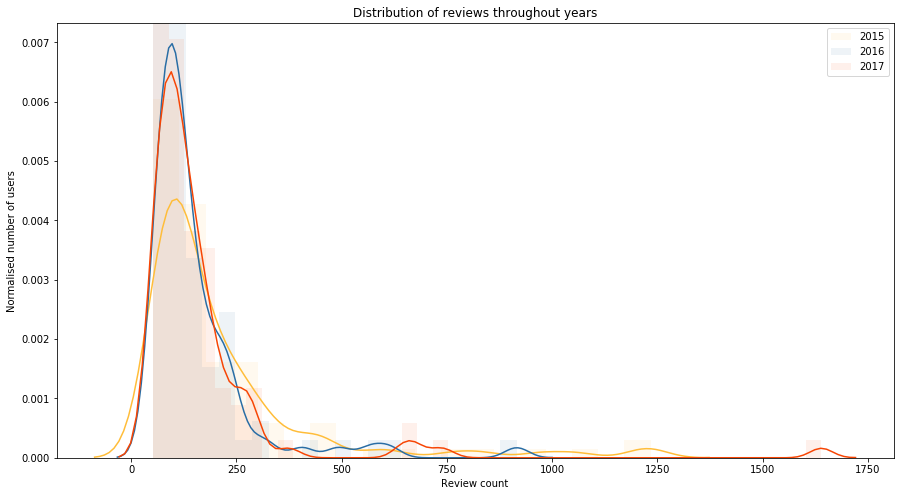

In [57]:
rcParams['patch.force_edgecolor'] = False
rcParams['patch.facecolor'] = 'b'

df_15 = pd.DataFrame.from_dict(review_count[0], orient='index')
df_16 = pd.DataFrame.from_dict(review_count[1], orient='index')
df_17 = pd.DataFrame.from_dict(review_count[2], orient='index')

sns.distplot(df_15, label='2015', hist_kws=dict(alpha=.08), color="#FFBD39")
sns.distplot(df_16, label='2016', hist_kws=dict(alpha=.08), color="#296DA5")
sns.distplot(df_17, label='2017', hist_kws=dict(alpha=.08), color="#f74504")

plt.title("Distribution of reviews throughout years");
plt.xlabel("Review count");
plt.ylabel("Normalised number of users");
plt.rcParams["figure.figsize"] = [15, 8]
plt.legend();
plt.savefig("Website/user_review_distribution.png")

In [18]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate();
dir_path = '../yelp_dataset/'
spark_df_users = spark.read.json(dir_path + "yelp_academic_dataset_user.json")

spark_df_users = spark_df_users.where("friends != 'None' AND elite != 'None'")
spark_df_users = spark_df_users.drop("average_stars", "compliment_cool", "compliment_cute", "compliment_funny",
                                     "compliment_hot", "compliment_list", "compliment_more", "compliment_note",
                                     "compliment_photos", "compliment_plain", "compliment_profile",
                                     "compliment_writer", "cool", "funny", "useful", "yelping_since")
# spark_df_users.write.format("json").save("elite_users_with_friends.json")

#spark_df_users = spark_df_users.withColumn("friends", split(col("friends"), "\\|"))
el_u_total = spark_df_users.count()
#spark_df_users = spark_df_users.where(spark_df_users.elite.like('2017'))
#spark_df_users = spark_df_users.where(spark_df_users.fans > 10)
#spark_df_users = spark_df_users.where(spark_df_users.review_count > 50)
#spark_df_users.sort('fans', ascending=True).show()
print("Total elite users: ", el_u_total)
el_u_filtered = spark_df_users.count()
print("Only filtered elite users: ", el_u_filtered)

Total elite users:  66871
Only filtered elite users:  66871


<hr>

In [5]:
import networkx as nx

user_nw_undir = nx.Graph()

user_nw_undir.add_nodes_from(list(dic.keys()), node_color='blue')

for key in dic:
    for elt in dic[key]['friends']:
        user_nw_undir.add_node(elt, node_color='red')
        user_nw_undir.add_edge(key, elt)

Construction of the network

In [120]:
import fa2
import matplotlib.pyplot as plt


forceatlas2 = fa2.ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=0,

    # Performance
    jitterTolerance=.01,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio= 1,
    strongGravityMode=True,
    gravity=200,
    # Log
    verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(user_nw_undir,
                                                    pos=None,
                                                    iterations=500)


 62%|██████▏   | 309/500 [01:58<01:03,  2.99it/s]


100%|██████████| 500/500 [03:04<00:00,  2.75it/s]


BarnesHut Approximation  took  69.53  seconds
Repulsion forces  took  107.25  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.25  seconds
AdjustSpeedAndApplyForces step  took  3.12  seconds


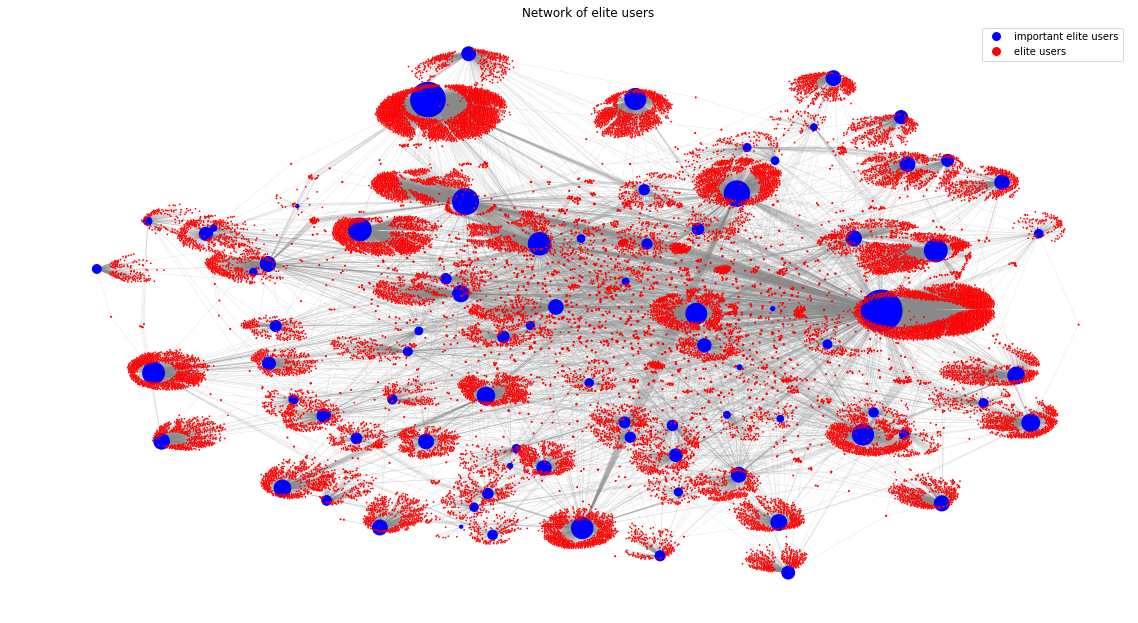

In [188]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='important elite users',
                          markerfacecolor='b', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='elite users',
                          markerfacecolor='r', markersize=10)]

degrees = [degree[1]*0.5 for degree in nx.degree(user_nw_undir)]

node_color = list(nx.get_node_attributes(user_nw_undir,'node_color').values())

plt.rcParams["figure.figsize"] = [15, 8]
    
nx.draw(user_nw_undir,
        positions,
        cmap=plt.get_cmap('jet'),
        edge_color="#898989",
        node_size= degrees,
        node_color = node_color,
        overlap = False,
        width = .1,
        with_labels=False)

plt.title("Network of elite users")
plt.savefig("elite_users_network.png")
plt.legend(handles=legend_elements)
plt.show()

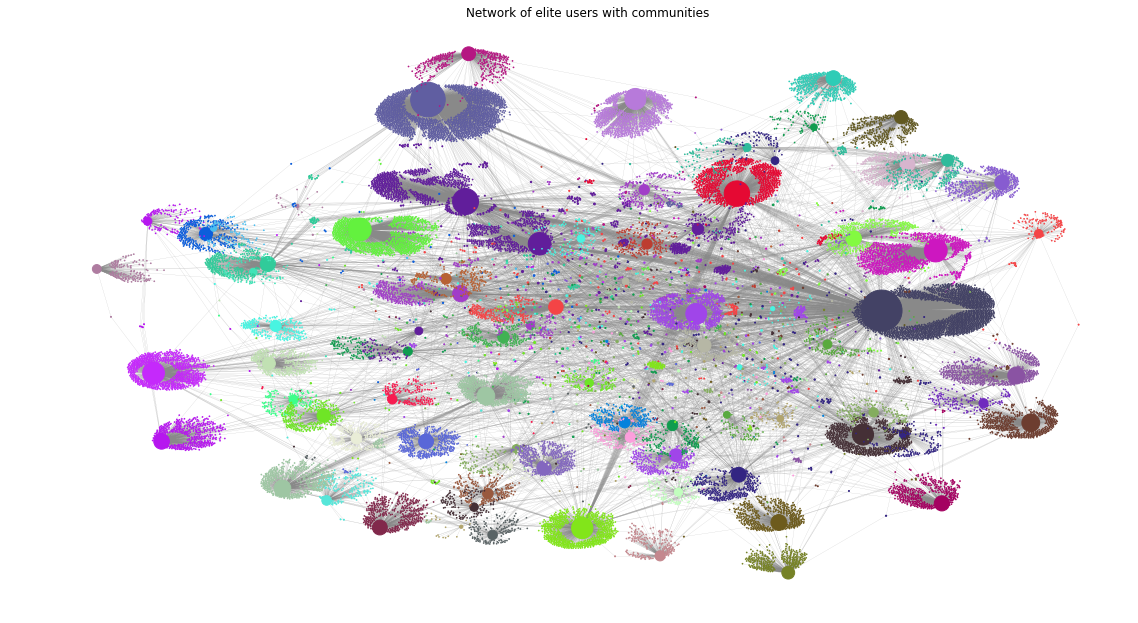

In [189]:
import community
import numpy as np

partition = community.best_partition(user_nw_undir)

node_color_indices = [node[1] for node in partition.items()]
partColors = {i: list(np.random.random(size=3)) for i in set(node_color_indices)}
node_colors = [partColors[index] for index in node_color_indices]

nx.draw(user_nw_undir, positions, node_color=node_colors,edge_color="#898989", node_size=degrees, width = 0.1, with_labels=False)
plt.title("Network of elite users with communities")
plt.savefig("network_elite_users_com.png")

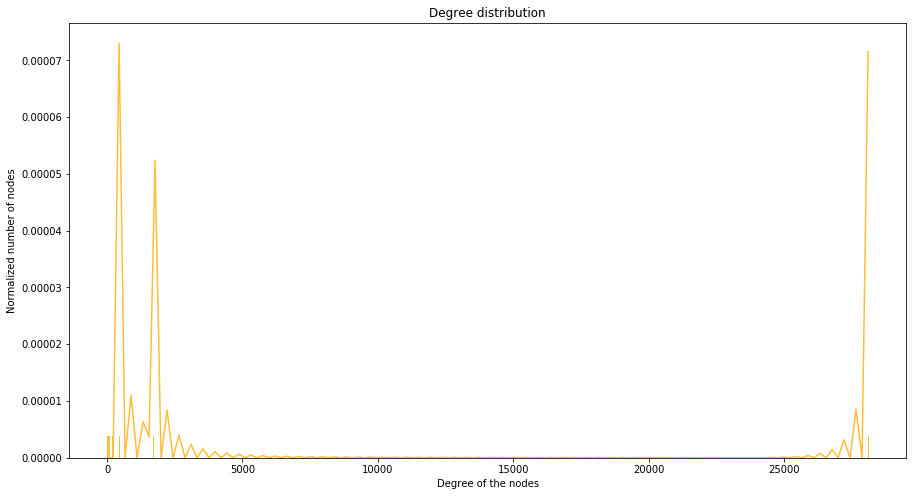

In [157]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

deg = [degree[1] for degree in nx.degree(user_nw_undir)]  
df_deg = pd.DataFrame(deg, columns=["degree"])

sns.distplot(df_deg.degree.value_counts(), hist=False,rug=True, color="#FFBD39");

plt.title("Degree distribution");
plt.ylabel("Normalized number of nodes");
plt.xlabel("Degree of the nodes");

<hr>